
# Predictive analytics 

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("E:/Datas/anz.csv")

In [3]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

In [5]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

# Data Cleaning

In [6]:
# Checking for missing values
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [7]:
# Drop columns with a high percentage of missing values
data = data.drop(['bpay_biller_code','merchant_code'], axis=1)

In [8]:
# Imputing columns with missing values
columns_to_impute = ['card_present_flag', 'merchant_id', 'merchant_suburb', 'merchant_state', 'merchant_long_lat']

imputer = SimpleImputer(strategy='most_frequent')  #since all are categorical 

# Apply the imputer to selected columns
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

In [9]:
# Verifying if any missing values further exist
data.isnull().sum()

status               0
card_present_flag    0
account              0
currency             0
long_lat             0
txn_description      0
merchant_id          0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
country              0
customer_id          0
merchant_long_lat    0
movement             0
dtype: int64

In [10]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Basic EDA

In [11]:
data.describe()

,balance,age,amount
count,12043.000000,12043.000000,12043.000000
mean,14704.195553,30.582330,187.933588
std,31503.722652,10.046343,592.599934
min,0.240000,18.000000,0.100000
25%,3158.585000,22.000000,16.000000
50%,6432.010000,28.000000,29.000000
75%,12465.945000,38.000000,53.655000
max,267128.520000,78.000000,8835.980000


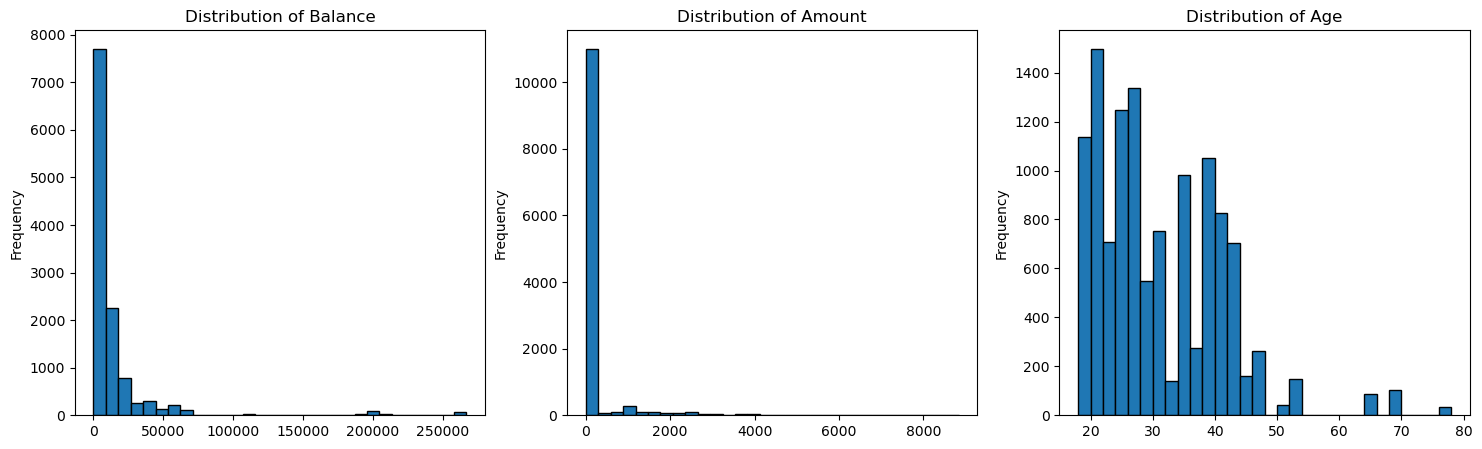

In [12]:
# Histograms for numerical variables
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
data['balance'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Balance')

plt.subplot(1, 3, 2)
data['amount'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Amount')

plt.subplot(1, 3, 3)
data['age'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Age')
plt.show()

#### We can see that the distribution of balance and amount has certain skewness.

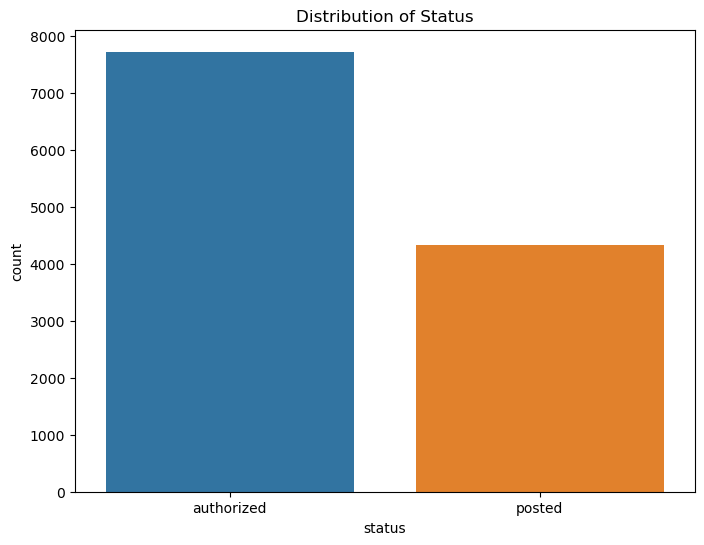

In [13]:
# Countplot for 'status'
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=data)
plt.title('Distribution of Status')
plt.show()

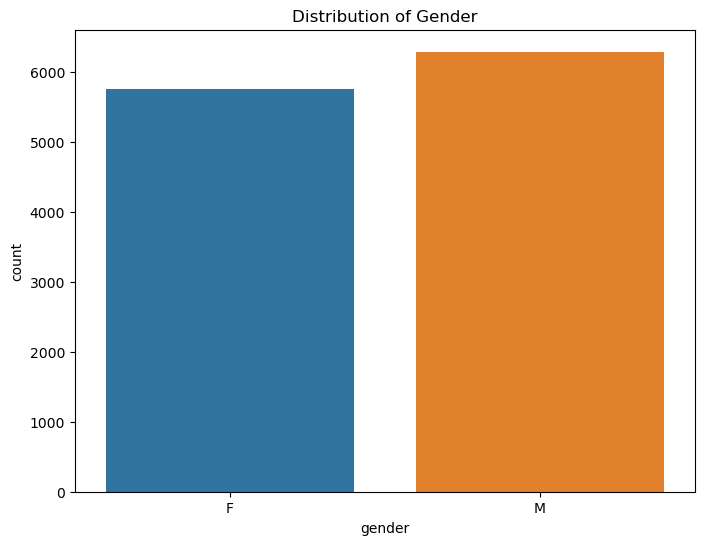

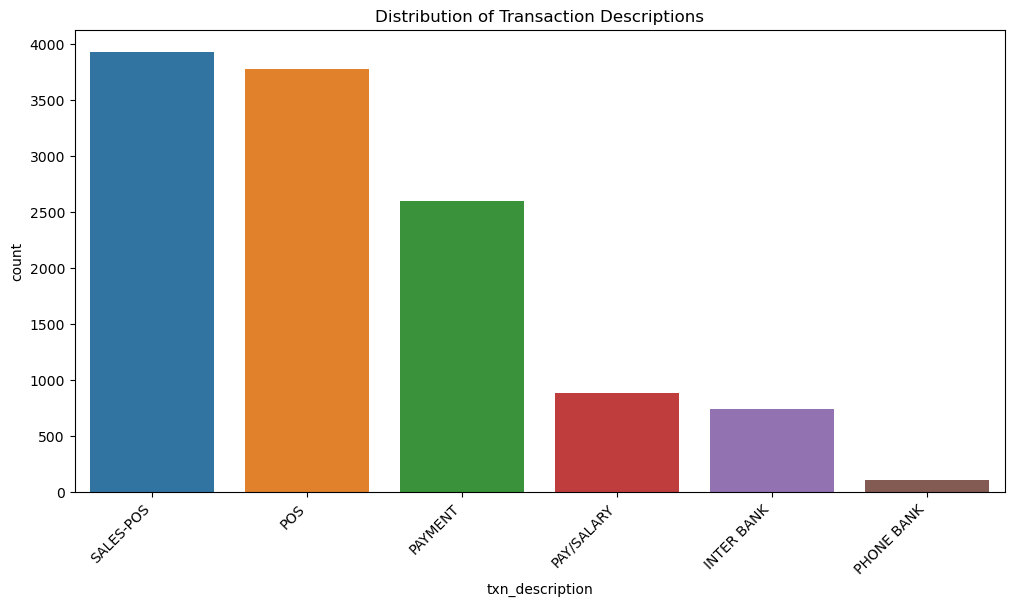

In [14]:
# Bar plot for categorical variables
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=data)
plt.title('Distribution of Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='txn_description', data=data, order=data['txn_description'].value_counts().index)
plt.title('Distribution of Transaction Descriptions')
plt.xticks(rotation=45, ha='right')
plt.show()

#### We can make out from the above Most transactions are Sales-POS and POS. Phone bank has the least transactions. 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


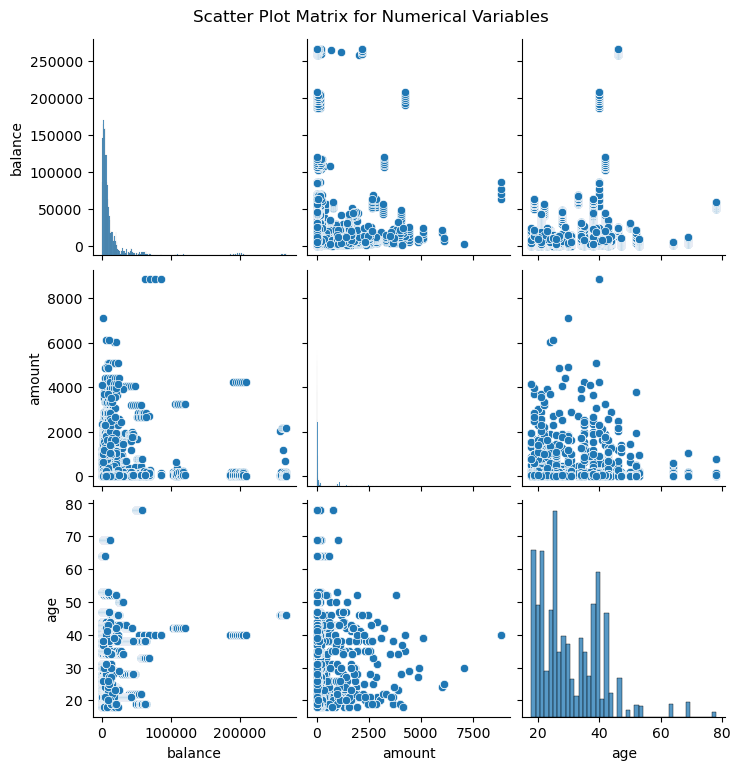

In [15]:
# Scatter plot matrix for numerical variables
sns.pairplot(data[['balance', 'amount', 'age']])
plt.suptitle('Scatter Plot Matrix for Numerical Variables', y=1.02)
plt.show()

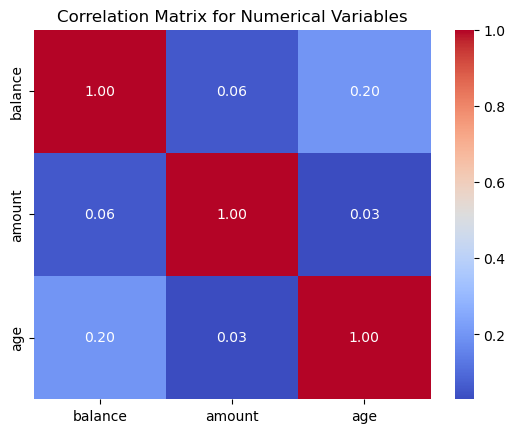

In [16]:
# Correlation matrix
correlation_matrix = data[['balance', 'amount', 'age']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

#### All these three features do not have very strong correlation ampng them.

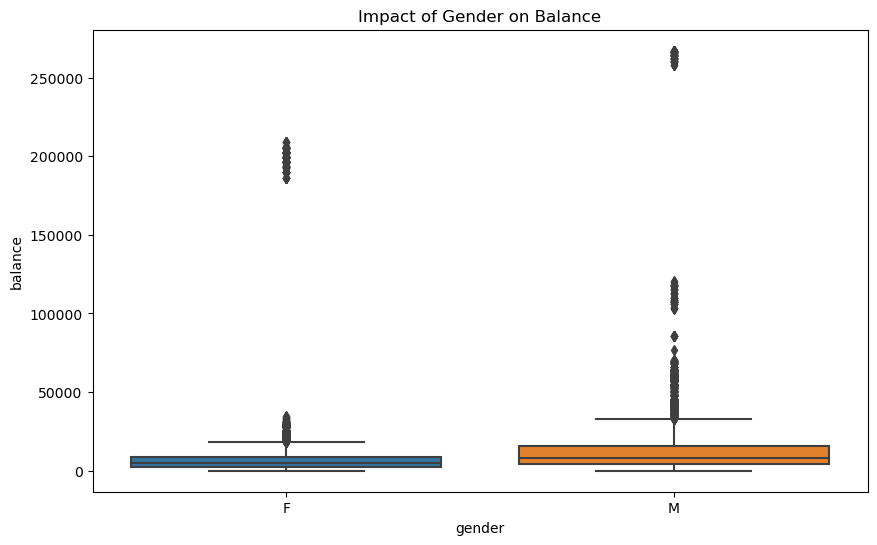

In [17]:
# Box plot for 'gender' vs 'balance'
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='balance', data=data)
plt.title('Impact of Gender on Balance')
plt.show()

#### Males share ois higher but we can see many outliers here.

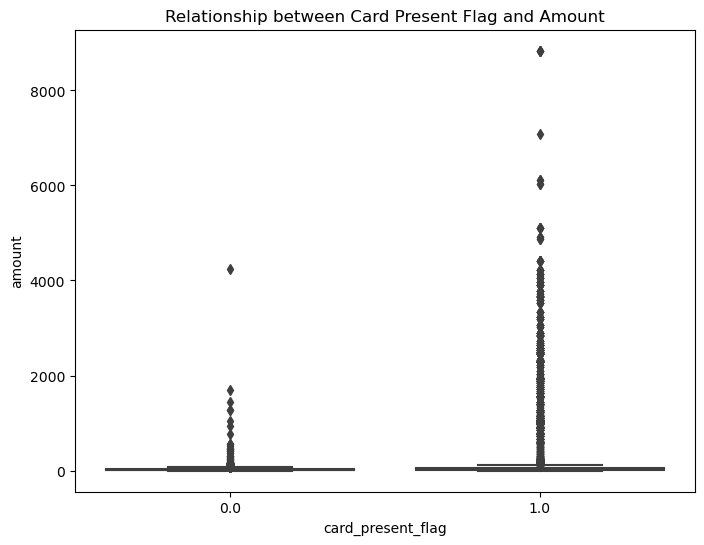

In [18]:
# Box plot for 'card_present_flag' vs 'amount'
plt.figure(figsize=(8, 6))
sns.boxplot(x='card_present_flag', y='amount', data=data)
plt.title('Relationship between Card Present Flag and Amount')
plt.show()

#### So we can see many ouliers so we will use isolation forest for this.

# Dealing with Outliers

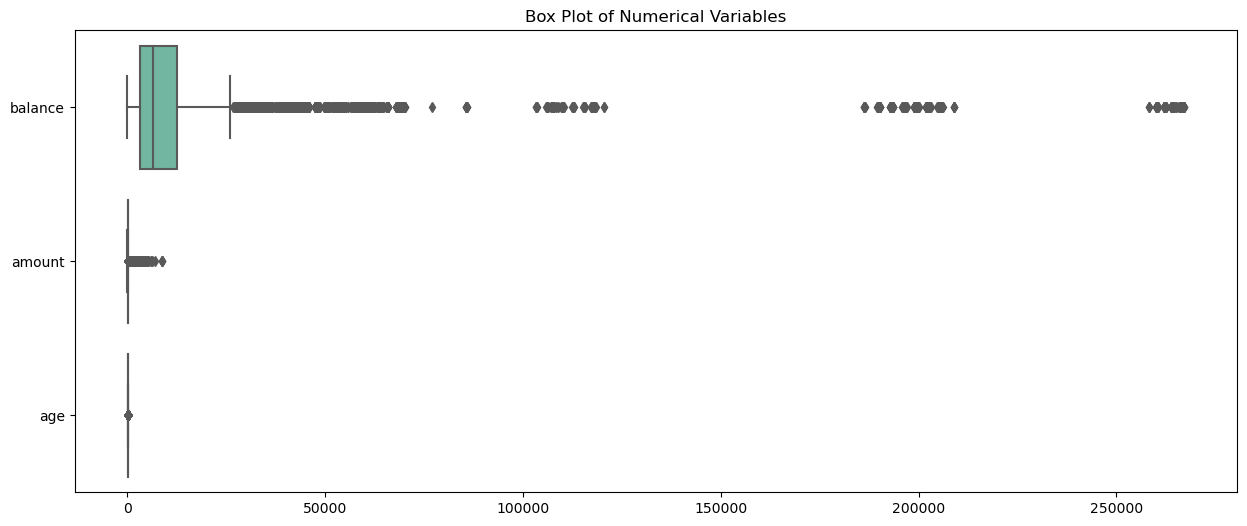

In [19]:
# Create a DataFrame with only numerical variables
numerical_data = data[['balance', 'amount', 'age']]

# Visualize the distribution of numerical variables using box plots
plt.figure(figsize=(15, 6))
sns.boxplot(data=numerical_data, orient="h", palette="Set2")
plt.title('Box Plot of Numerical Variables')
plt.show()

In [20]:
# Apply Isolation Forest for outlier detection
outlier_detector = IsolationForest(contamination=0.5, random_state=42)
outliers = outlier_detector.fit_predict(numerical_data)

# Identify and handle outliers
data['is_outlier'] = outliers
data_cleaned = data[data['is_outlier'] != -1]

data = data.drop('is_outlier', axis=1)

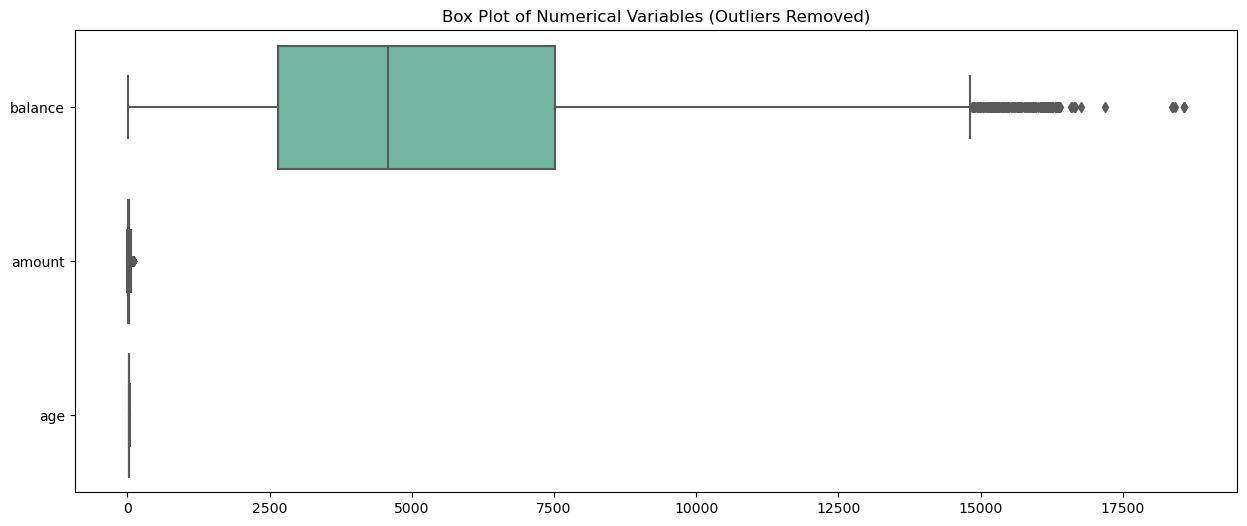

In [21]:
# Visualize the distribution of numerical variables after handling outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=data_cleaned[['balance', 'amount', 'age']], orient="h", palette="Set2")
plt.title('Box Plot of Numerical Variables (Outliers Removed)')
plt.show()

#### Using Isolation forest we almost reduced the outliers in the features.

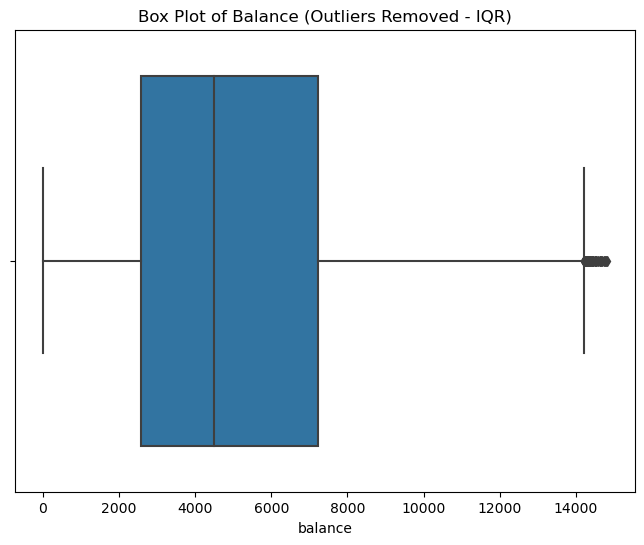

In [22]:
# Calculate the IQR for 'balance'
Q1 = data_cleaned['balance'].quantile(0.25)
Q3 = data_cleaned['balance'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and handle outliers in 'balance'
data = data_cleaned[(data_cleaned['balance'] >= lower_bound) & (data_cleaned['balance'] <= upper_bound)]

# Visualize the distribution of 'balance' after handling outliers with IQR
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['balance'])
plt.title('Box Plot of Balance (Outliers Removed - IQR)')
plt.show()

#### We considerably reduced the outliers here by using IQR

In [23]:
# Set 'date' as the index for time series analysis
data_cleaned.set_index('date', inplace=True)

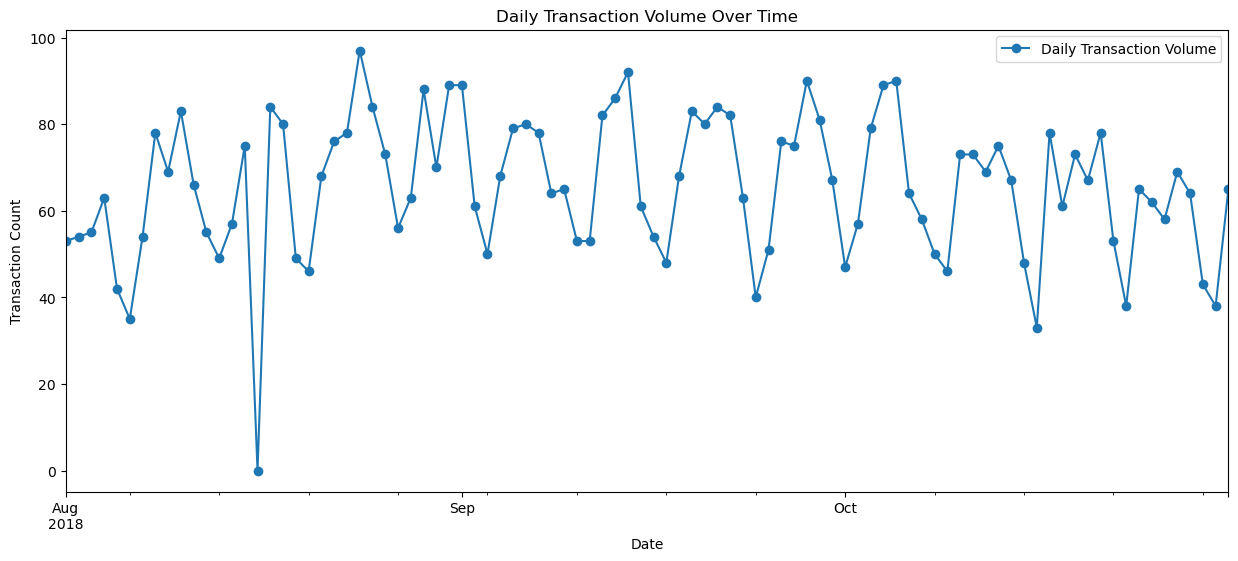

In [25]:
# Explore trends over time 

#Daily Transactions 
daily_transaction_volume = data_cleaned.resample('D').size()

# Plot daily transaction volume
plt.figure(figsize=(15, 6))
daily_transaction_volume.plot(label='Daily Transaction Volume', marker='o')
plt.title('Daily Transaction Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.legend()
plt.show()

C:\Users\TEJAS\AppData\Local\Temp\ipykernel_16680\3406952354.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_transaction_amount = data_cleaned.resample('M').sum()['amount']


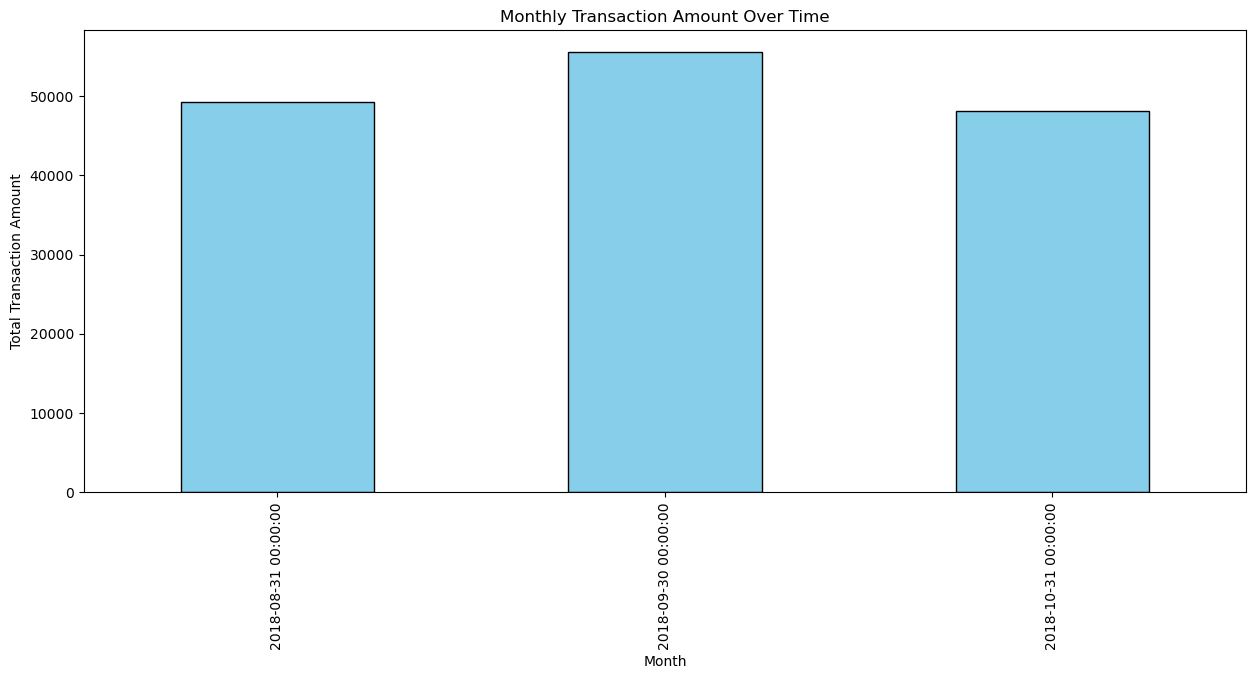

In [27]:
# Monthly Transactions
monthly_transaction_amount = data_cleaned.resample('M').sum()['amount']

# Plot monthly transaction amount
plt.figure(figsize=(15, 6))
monthly_transaction_amount.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Monthly Transaction Amount Over Time')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.show()

#### The Month of September has the highest number of transactions

# Predictive Analytics 

In [29]:
# Select features and target variable
features_for_regression = ['balance', 'age']
target_variable = 'amount'

In [31]:
# Subset the data for regression
regression_data = data_cleaned[features_for_regression + [target_variable]]

In [33]:
# Split the data into training and testing sets
X = regression_data[features_for_regression]
y = regression_data[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Perform Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [36]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred

array([24.23958482, 23.25338405, 23.70492746, ..., 25.68644814,
       22.11174287, 27.25463966])

In [37]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared Score: {r2:.4f}')

Mean Squared Error: 263.4517
R-squared Score: 0.0287


#### The Mean Squared Error (MSE) of 263.45 indicates that the linear regression model has a relatively high average squared difference between the actual and predicted 'amount' values. The R-squared score of 0.0287 suggests that the model explains only a small portion of the variance in the target variable. 
#### These metrics imply that the linear regression model may not be well-suited for predicting transaction amounts based solely on the provided features, 'balance' and 'age'. The low R-squared value indicates weak predictive power, and the MSE signifies a notable level of prediction error. 
#### Further exploration, feature engineering, or the application of more sophisticated models may be necessary to enhance predictive accuracy. In conclusion, the current linear regression model shows limited effectiveness in capturing the underlying patterns in the data, and additional analysis and model refinement are recommended for improved predictive capabilities.